# Timeseries (ARIMA Modeling)

Data sets from
https://timeseries.weebly.com/uploads/2/1/0/8/21086414/_births_and_deaths.csv
https://timeseries.weebly.com/data-sets.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/GGS/Desktop/25Nov18/ML/timeseries/_visitors.csv')

In [3]:
data.head()

,Date,Australia,"China, People's Republic of",Japan,United Kingdom
0,1998Q4,20288,1089,5938,13831
1,1999Q1,22047,1492,6925,23271
2,1999Q2,14362,1450,4353,9756
3,1999Q3,15775,1551,6855,7899
4,1999Q4,21209,2020,6216,15778


In [4]:
data1 = pd.read_csv('/Users/GGS/Desktop/25Nov18/ML/timeseries/_births_and_deaths.csv')

In [5]:
data1.head()

,Quarter,Male Live Births,Female Live Births,Male Deaths,Female Deaths
0,2000Q1,7639,7139,3346,3070
1,2000Q2,7365,6866,3372,3178
2,2000Q3,7174,6843,3675,3511
3,2000Q4,6979,6600,3357,3151
4,2001Q1,7496,7232,3231,3070


In [6]:
import re

In [7]:
gr=re.match(r'^(\d+)Q(\d)','2000Q1')

In [8]:
gr.group(1)

'2000'

In [9]:
gr.group(2)

'1'

In [10]:
import re
import datetime
def get_date(d_str):
    mat = re.match(r'^(\d+)Q(\d)',d_str)
    year = mat.group(1)
    mon = mat.group(2)
    #print (year)
    #print (mon)
    if mat.group(2) == '1':
        month ='01'
    elif mat.group(2) == '2':
        month ='04'
    elif mat.group(2) == '3':
        month ='07'
    elif mat.group(2) == '4':
        month ='10'
    return datetime.datetime.strptime('01%s%s'%(month,year), '%d%m%Y')
    #return str(year)+str('-')+str(month)+str('-')+str('01')

In [11]:
print(get_date('2000Q1'))

2000-01-01 00:00:00


In [12]:
dateparse = lambda dates: get_date(dates)
data_0 = pd.read_csv('/Users/GGS/Desktop/25Nov18/ML/timeseries/_births_and_deaths.csv', parse_dates=['Quarter'], index_col='Quarter',date_parser=dateparse)

In [13]:
data_0.head()

,Male Live Births,Female Live Births,Male Deaths,Female Deaths
Quarter,,,,
2000-01-01,7639,7139,3346,3070
2000-04-01,7365,6866,3372,3178
2000-07-01,7174,6843,3675,3511
2000-10-01,6979,6600,3357,3151
2001-01-01,7496,7232,3231,3070


In [14]:
ts = data_0["Male Live Births"]

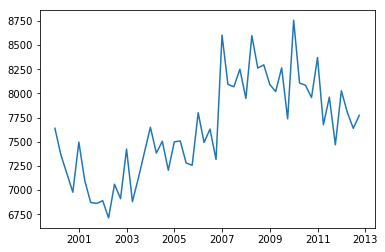

In [15]:
plt.plot(ts)

In [16]:
from utils import  ad_fuller_test, plot_rolling_stats,plot_acf_pacf

Test Statistic                 -1.135881
p-value                         0.700553
#Lags Used                      3.000000
Number of Observations Used    48.000000
Critical Value (10%)           -2.600039
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
dtype: float64


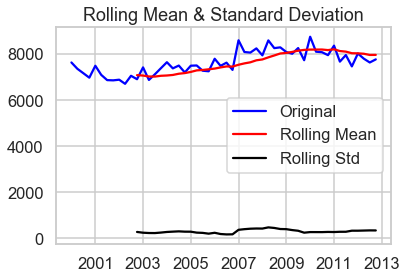

In [17]:
ad_fuller_test(ts)
plot_rolling_stats(ts)

In [18]:
ts_log = np.log(ts)

Test Statistic                 -1.122713
p-value                         0.705930
#Lags Used                      3.000000
Number of Observations Used    48.000000
Critical Value (10%)           -2.600039
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
dtype: float64


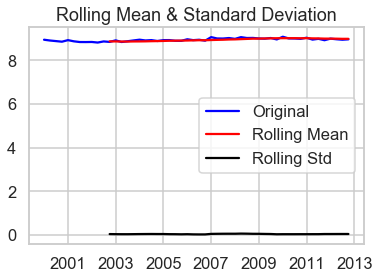

In [19]:
ad_fuller_test(ts_log)
plot_rolling_stats(ts_log)

In [20]:
moving_avg = pd.rolling_mean(ts_log,12)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


In [21]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [22]:
ts_log_moving_avg_diff.dropna(inplace=True)

Test Statistic                 -2.109502
p-value                         0.240711
#Lags Used                      1.000000
Number of Observations Used    39.000000
Critical Value (10%)           -2.608063
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
dtype: float64


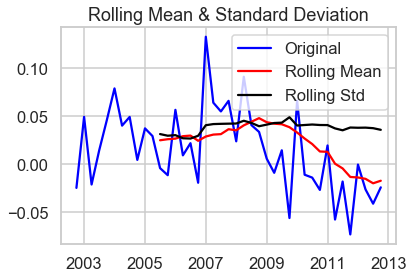

In [23]:
ad_fuller_test(ts_log_moving_avg_diff)
plot_rolling_stats(ts_log_moving_avg_diff)

In [24]:
ts_log_diff = ts_log - ts_log.shift()

In [25]:
ts_log_diff.dropna(inplace=True)

In [26]:
ts_log_diff.dropna(inplace=True)

Test Statistic                -6.696353e+00
p-value                        3.990516e-09
#Lags Used                     2.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (10%)          -2.600039e+00
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
dtype: float64


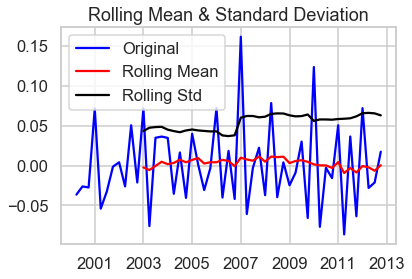

In [27]:
ad_fuller_test(ts_log_diff)
plot_rolling_stats(ts_log_diff)

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

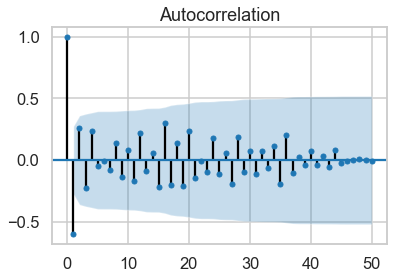

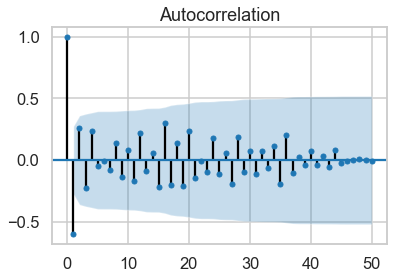

In [29]:
plot_acf(ts_log_diff,lags=50)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


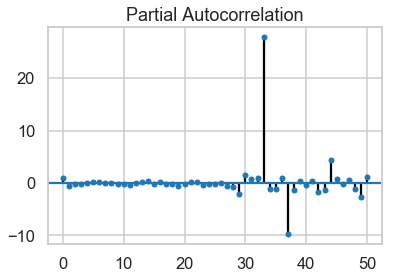

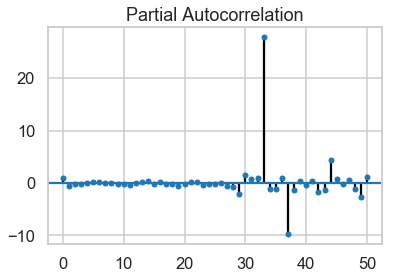

In [30]:
plot_pacf(ts_log_diff,lags=50)

In [31]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [32]:
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        mod=ARIMA(ts_log_diff,order=param)
        results=mod.fit()
        print('ARIMA{} - AIC:{}'.format(param,results.aic))
    except Exception as e:
        #print("err")
        #print (e)
        continue

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0) - AIC:-154.25545988103605
ARIMA(0, 0, 1) - AIC:-174.77927004402216
ARIMA(0, 0, 2) - AIC:-176.7882026878143
ARIMA(0, 1, 0) - AIC:-92.1265877571833


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(0, 1, 1) - AIC:-144.2409938813688
ARIMA(0, 2, 0) - AIC:-27.319769235586406
ARIMA(0, 2, 1) - AIC:-83.3049083260444


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(1, 0, 0) - AIC:-175.16468411500892
ARIMA(1, 0, 1) - AIC:-176.05477673067782

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)



ARIMA(1, 0, 2) - AIC:-170.7553304878994


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 3) - AIC:-172.78068210506967
ARIMA(1, 0, 4) - AIC:-177.6255179845785
ARIMA(1, 1, 0) - AIC:-134.45395019780295


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(1, 1, 4) - AIC:-163.8202886021116
ARIMA(1, 2, 0) - AIC:-83.38741188849158


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 0) - AIC:-174.7205559117058
ARIMA(2, 0, 1) - AIC:-174.05733216374443


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 2) - AIC:-176.47882469727716


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(2, 0, 3) - AIC:-176.38288890380102


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency

ARIMA(2, 0, 4) - AIC:-177.02109601567622
ARIMA(2, 1, 0) - AIC:-142.0930987257728


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(2, 2, 0) - AIC:-98.45822715567226


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(3, 0, 0) - AIC:-176.2780369660785


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 1) - AIC:-174.28836515805767


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 2) - AIC:-178.5501447150288


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 3) - AIC:-177.53422787131643


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 0, 4) - AIC:-172.3226115527578


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 0) - AIC:-152.34079522148522


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency

ARIMA(3, 1, 1) - AIC:-164.01850103889848


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 2) - AIC:-162.0483113834706


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in tr

ARIMA(3, 1, 4) - AIC:-165.42862925317553
ARIMA(3, 2, 0) - AIC:-109.54213879485573


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(4, 0, 0) - AIC:-174.3050238212906


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 0, 1) - AIC:-172.35284997928818


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 0, 2) - AIC:-177.5616509092195


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 0, 3) - AIC:-175.85612339236303
ARIMA(4, 0, 4) - AIC:-173.64284868901376


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 0) - AIC:-161.3898591226294


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 1) - AIC:-163.79114610022498


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 2) - AIC:-161.88154673645954


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 3) - AIC:-165.4911238114803


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

ARIMA(4, 2, 1) - AIC:-147.92421001530928


C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No fre

In [33]:
model=ARIMA(ts_log_diff,order=(1,1,0))

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [34]:
arimaresult=model.fit()

In [35]:
predictions_ARIMA_diff = pd.Series(arimaresult.fittedvalues, copy=True)

In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [37]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


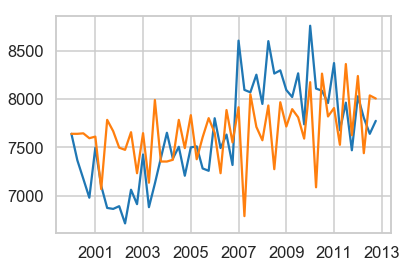

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)


In [39]:
l1=["2013Q1","2013Q2","2013Q3","2013Q4","2014Q1","2014Q2","2014Q3","2014Q4","2015Q1","2015Q2"]
ti_index=[get_date(q) for q in l1]

In [40]:
ar_predictions_ARIMA_log_1 = pd.Series(ts_log.ix[0], index=ti_index)

In [41]:
ar_predictions_ARIMA_diff_1 = pd.Series(arimaresult.forecast(10)[0], copy=True)

In [42]:
arimaresult.forecast(10)

(array([-0.01082994,  0.01174277, -0.0042019 ,  0.00906246,  0.00017663,
         0.00808803,  0.00326152,  0.0080946 ,  0.00560249,  0.00866532]),
 array([ 0.05889281,  0.06058815,  0.0773597 ,  0.08054221,  0.09078595,
         0.09475119,  0.10220818,  0.10647239,  0.11248102,  0.1167781 ]),
 array([[-0.12625772,  0.10459784],
        [-0.10700782,  0.13049337],
        [-0.15582413,  0.14742033],
        [-0.14879737,  0.16692229],
        [-0.17776056,  0.17811381],
        [-0.17762089,  0.19379694],
        [-0.19706282,  0.20358587],
        [-0.20058744,  0.21677664],
        [-0.21485626,  0.22606124],
        [-0.22021556,  0.23754619]]))

In [43]:
ar_predictions_ARIMA_diff_cumsum_1 = ar_predictions_ARIMA_diff_1.cumsum()

In [44]:
ar_predictions_ARIMA_log_1 = ar_predictions_ARIMA_log_1.add(ar_predictions_ARIMA_diff_cumsum_1,fill_value=0)

In [45]:
arpredictions_ARIMA_1 = np.exp(ar_predictions_ARIMA_log_1)

In [46]:
 ar_predictions_ARIMA_diff_1

0   -0.010830
1    0.011743
2   -0.004202
3    0.009062
4    0.000177
5    0.008088
6    0.003262
7    0.008095
8    0.005602
9    0.008665
dtype: float64

In [47]:
ar_predictions_ARIMA_diff_1 = pd.Series(arimaresult.forecast(10)[0],index=ti_index, copy=True)

In [48]:
ar_predictions_ARIMA_diff_cumsum_1 = ar_predictions_ARIMA_diff_1.cumsum()

In [49]:
ar_predictions_ARIMA_log_2 = pd.Series(ts_log.ix[0], index=ti_index)

In [50]:
ar_predictions_ARIMA_log_2 = ar_predictions_ARIMA_log_2.add(ar_predictions_ARIMA_diff_cumsum_1,fill_value=0)

In [51]:
ar_predictions_ARIMA_log_2

2013-01-01    8.930192
2013-04-01    8.941935
2013-07-01    8.937733
2013-10-01    8.946795
2014-01-01    8.946972
2014-04-01    8.955060
2014-07-01    8.958322
2014-10-01    8.966416
2015-01-01    8.972019
2015-04-01    8.980684
dtype: float64

In [52]:
arpredictions_ARIMA_2 = np.exp(ar_predictions_ARIMA_log_2)

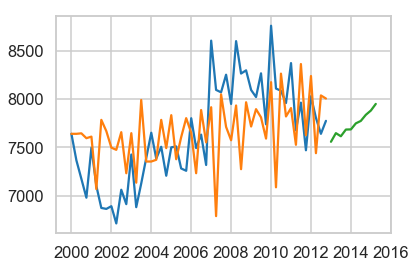

In [53]:
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.plot(arpredictions_ARIMA_2)